In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')


## EDA

In [ ]:
train_data = pd.read_csv("C:/Users/JINU/Desktop/JINU/Coding/ML/ML_PRAC_2023_WINTER/Dacon/고객_대출등급_분류_해커톤/open/open/train.csv")
test_data = pd.read_csv("C:/Users/JINU/Desktop/JINU/Coding/ML/ML_PRAC_2023_WINTER/Dacon/고객_대출등급_분류_해커톤/open/open/test.csv")

In [ ]:
train_data.info()

In [ ]:
test_data.info()

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
#이산형 데이터와 연속형 데이터를 구분하여서 데이터를 파악해보기 + ID는 DB의 PK와 같은 역할을 하므로 제외.
columns = train_data.columns.to_list()
disc_columns = train_data.select_dtypes('object').columns.to_list()[1:]
cont_columns = train_data.select_dtypes(exclude='object').columns.to_list()
print(columns)
print(disc_columns)
print(cont_columns)

Text(0.5, 1.0, '대출목적')

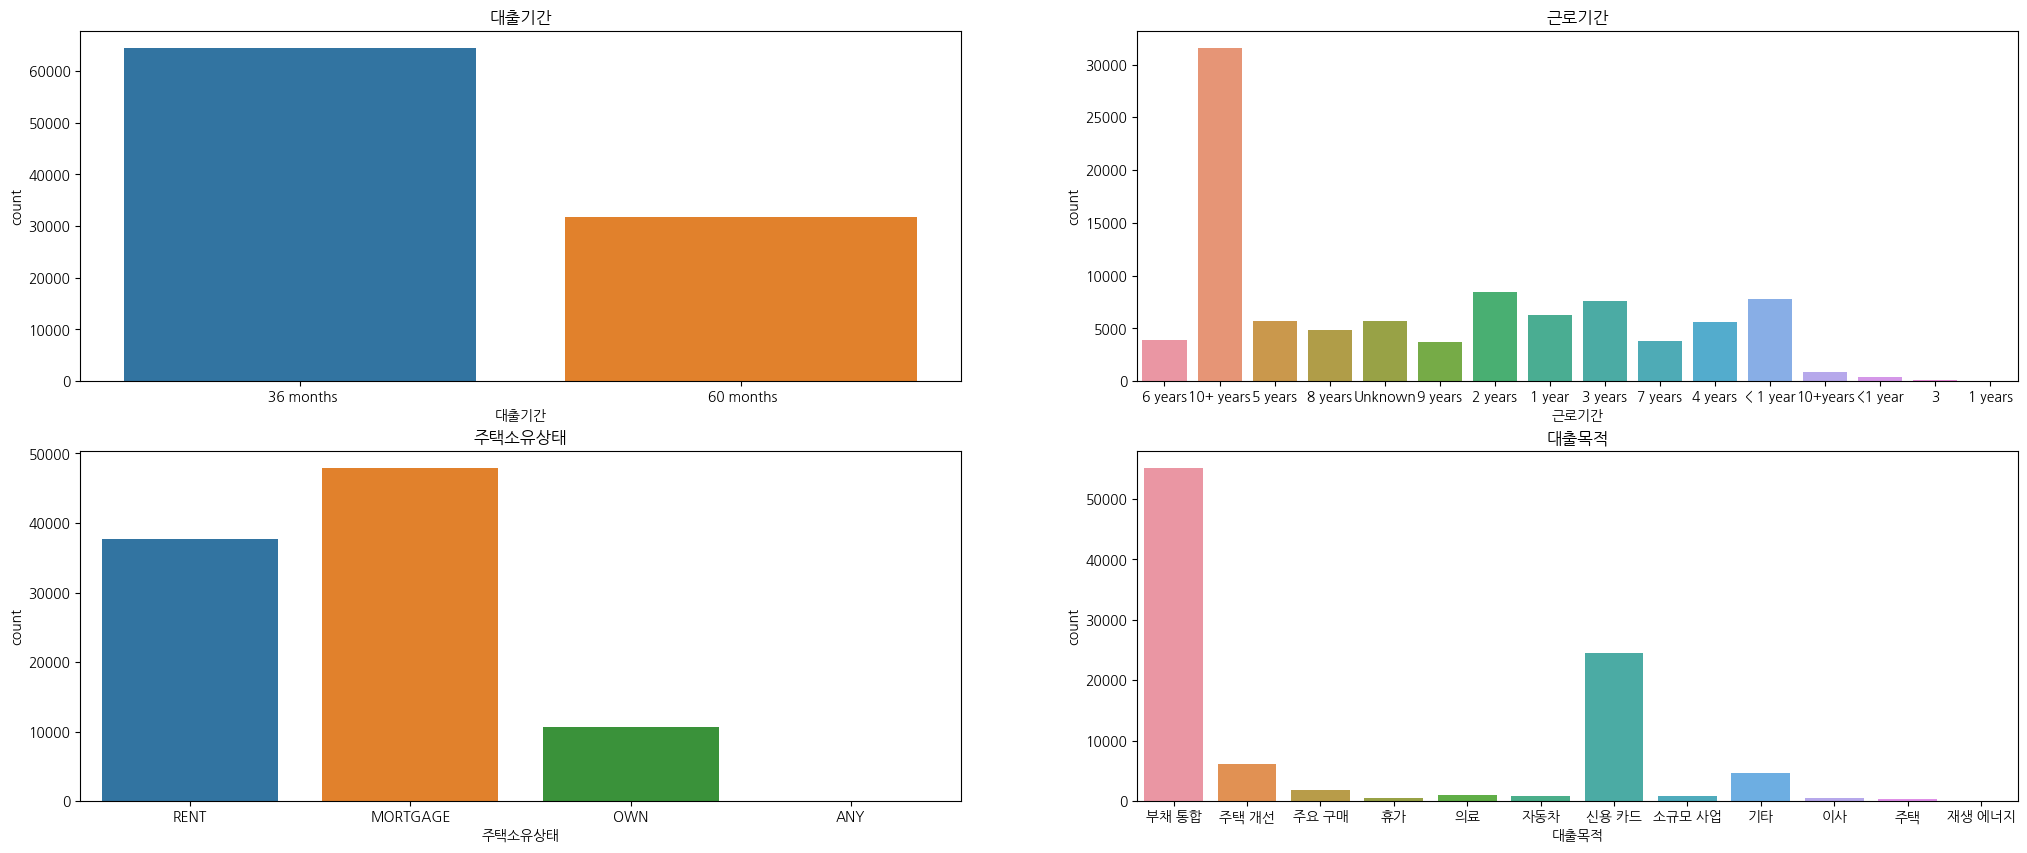

In [15]:
fe = fm.FontEntry(fname = 'C:/Windows/Fonts/NanumGothic.ttf', name = 'NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='NanumGothic')

fig, axes = plt.subplots(2, 2, figsize=(25,10)) # 2x2 형식으로 4개 그래프 동시에 표시

sns.countplot(x = train_data['대출기간'], ax=axes[0][0]).set_title('대출기간')
sns.countplot(x = train_data['근로기간'], ax=axes[0][1]).set_title('근로기간')
sns.countplot(x = train_data['주택소유상태'], ax=axes[1][0]).set_title('주택소유상태')
sns.countplot(x = train_data['대출목적'], ax=axes[1][1]).set_title('대출목적')


In [18]:
#데이터에 노이즈가 끼어있음을 알 수 있다. 
# 근로기간의 경우 값이 다르게 입력되어 있는 경우가 있다. 
# 주택 소유상태는 ANY라는 값이 있다.

In [16]:
train_data['근로기간'] = train_data['근로기간'].str.replace('1 years', '1 year')
train_data['근로기간'] = train_data['근로기간'].str.replace('< 1 year', '<1 year')
train_data['근로기간'] = train_data['근로기간'].str.replace('3 years', '3')
train_data['근로기간'] = train_data['근로기간'].str.replace('3', '3 years')
train_data['근로기간'] = train_data['근로기간'].str.replace('10+years', '10+ years')

In [17]:
test_data['근로기간'] = test_data['근로기간'].str.replace('1 years', '1 year')
test_data['근로기간'] = test_data['근로기간'].str.replace('< 1 year', '<1 year')
test_data['근로기간'] = test_data['근로기간'].str.replace('3 years', '3')
test_data['근로기간'] = test_data['근로기간'].str.replace('3', '3 years')
test_data['근로기간'] = test_data['근로기간'].str.replace('10+years', '10+ years')

In [21]:
train_data[train_data['주택소유상태']=='ANY']#test set에는 없는 값, 주택소유상태가 ANY인 줄이 하나 있음, 표본의 양이 큰 데이터라 상관없겠지만 지우고 한다. 

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
28730,TRAIN_28730,41160000,36 months,10+ years,ANY,93600000,17.71,20,기타,0,0,0.0,0.0,0.0,C


In [22]:
train_data.drop(train_data[train_data['주택소유상태']=='ANY'].index,inplace=True)
train_data[train_data['주택소유상태']=='ANY']

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급


In [26]:
for column in disc_columns:
    print(column,sorted(train_data[column].unique()),end='\n'+ '-'*50 +'\n')

print()
for column in disc_columns[:-1]:
    print(column,sorted(test_data[column].unique()),end='\n'+ '-'*50 +'\n')

대출기간 [' 36 months', ' 60 months']
--------------------------------------------------
근로기간 ['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '<1 year', 'Unknown']
--------------------------------------------------
주택소유상태 ['MORTGAGE', 'OWN', 'RENT']
--------------------------------------------------
대출목적 ['기타', '부채 통합', '소규모 사업', '신용 카드', '의료', '이사', '자동차', '재생 에너지', '주요 구매', '주택', '주택 개선', '휴가']
--------------------------------------------------
대출등급 ['A', 'B', 'C', 'D', 'E', 'F', 'G']
--------------------------------------------------

대출기간 [' 36 months', ' 60 months']
--------------------------------------------------
근로기간 ['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '<1 year', 'Unknown']
--------------------------------------------------
주택소유상태 ['MORTGAGE', 'OWN', 'RENT']
--------------------------------------------------
대출목적 ['결혼', '기타', '부채 통합', '소규모 사업'

<Axes: xlabel='대출목적', ylabel='count'>

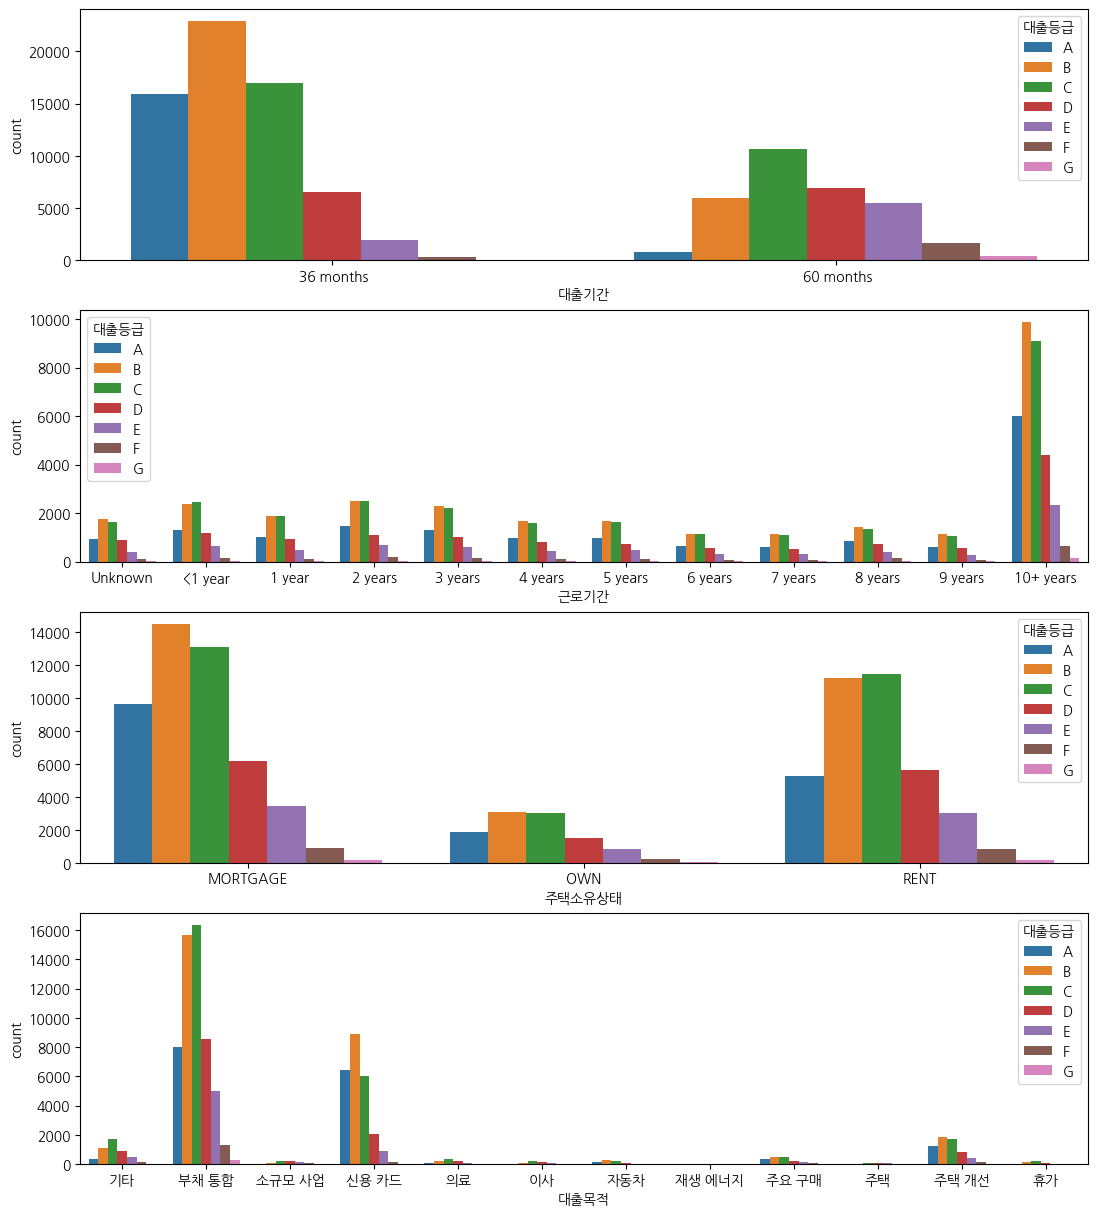

In [49]:
fig, axes = plt.subplots(4, 1, figsize=(13, 15)) # 2x2 형식으로 4개 그래프 동시에 표시

sns.countplot(x = train_data['대출기간'], ax=axes[0],order=sorted(train_data['대출기간'].unique()),hue=train_data['대출등급'],hue_order=sorted(train_data['대출등급'].unique()))#.set_title('대출기간')
sns.countplot(x = train_data['근로기간'], ax=axes[1],order=['Unknown', '<1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years' ],hue=train_data['대출등급'],hue_order=sorted(train_data['대출등급'].unique()))#.set_title('근로기간')
sns.countplot(x = train_data['주택소유상태'], ax=axes[2],order=sorted(train_data['주택소유상태'].unique()),hue=train_data['대출등급'],hue_order=sorted(train_data['대출등급'].unique()))#.set_title('주택소유상태')
sns.countplot(x = train_data['대출목적'], ax=axes[3],order=sorted(train_data['대출목적'].unique()),hue=train_data['대출등급'],hue_order=sorted(train_data['대출등급'].unique()))#.set_title('대출목적')

Text(0.5, 1.0, '대출목적')

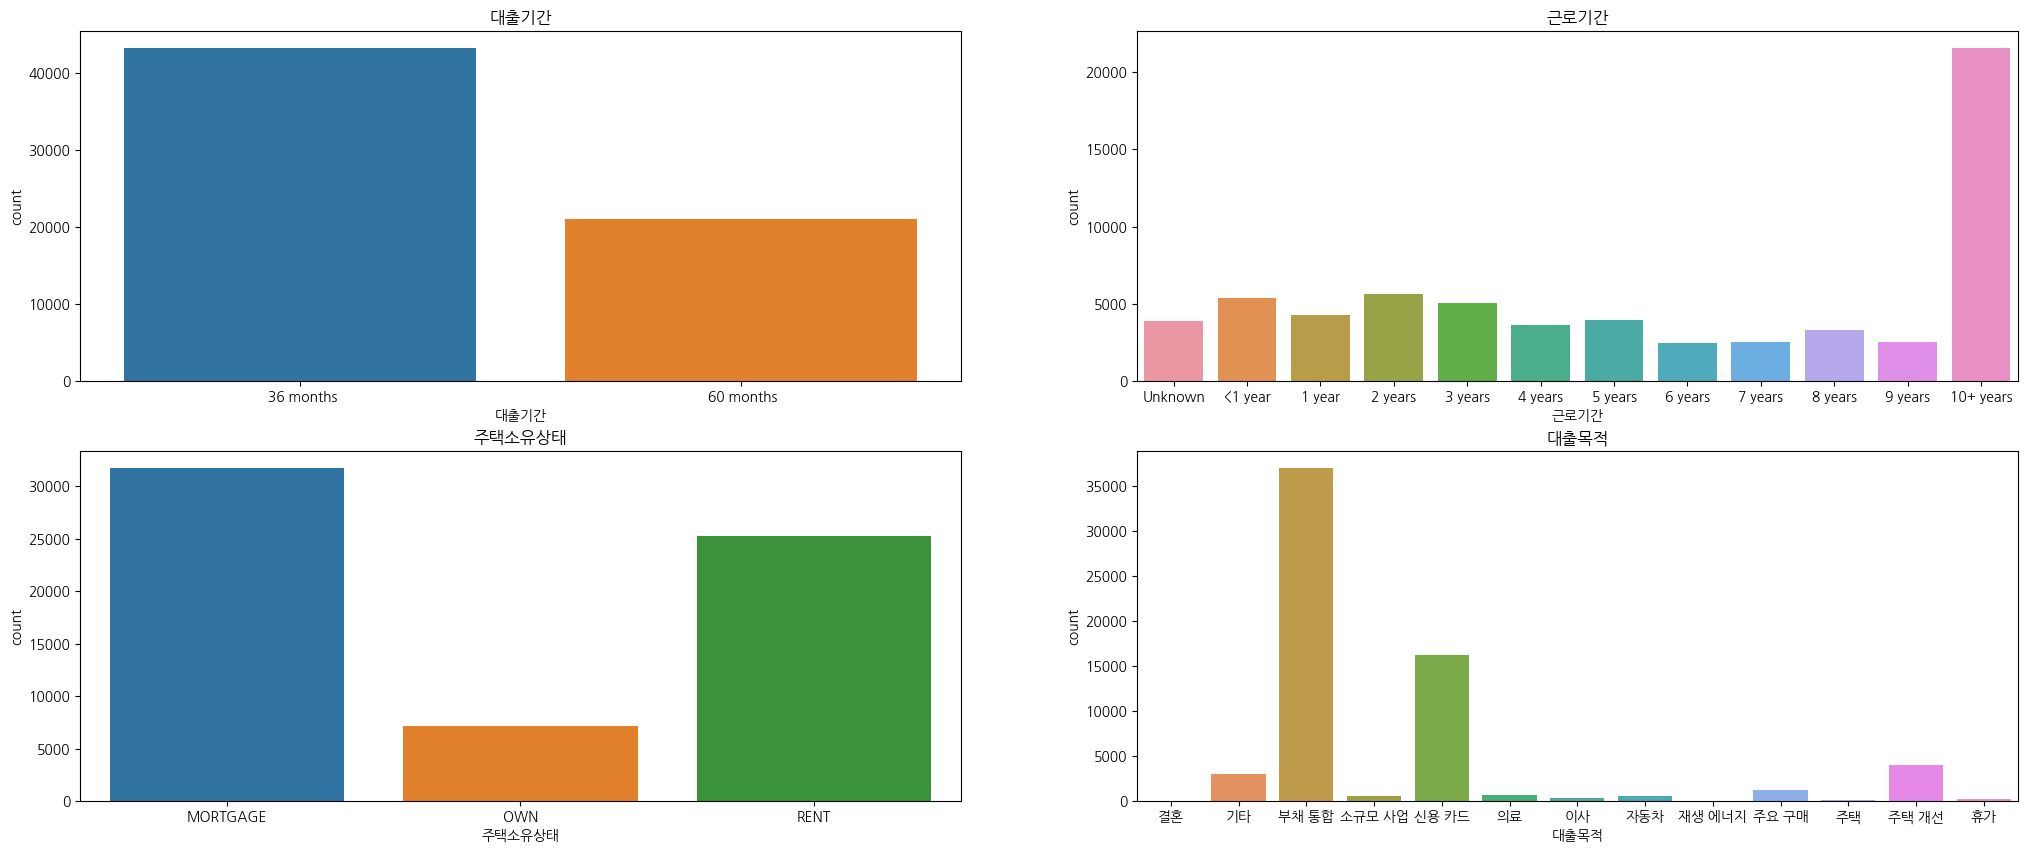

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(25,10)) # 2x2 형식으로 4개 그래프 동시에 표시


sns.countplot(x = test_data['대출기간'], ax=axes[0][0],order=sorted(test_data['대출기간'].unique())).set_title('대출기간')
sns.countplot(x = test_data['근로기간'], ax=axes[0][1],order=['Unknown', '<1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years' ]).set_title('근로기간')
sns.countplot(x = test_data['주택소유상태'], ax=axes[1][0],order=sorted(test_data['주택소유상태'].unique())).set_title('주택소유상태')
sns.countplot(x = test_data['대출목적'], ax=axes[1][1],order=sorted(test_data['대출목적'].unique())).set_title('대출목적')

In [33]:
#대출기간은 3년 or 6년뿐임
#근로 기간은 10년 이상이 매우 많음, unknown이 있음.
#주택 소유상태는 3가지 ['MORTGAGE', 'OWN', 'RENT'] any는 무슨데이터지?
#대출목적은 다양하지만 부채 통합이 절반 이상임.
#대출등급은 A-G중 A가 더 높음.